# Import e funzioni ausiliarie

In [1]:
from tensorflow import keras as k
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
x = np.linspace(0,10,100)
y = np.power(x,2)

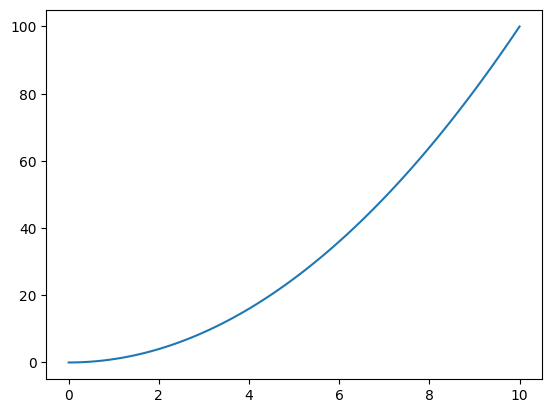

In [3]:
plt.plot(x,y)

In [4]:
def time_step(data, label, step=10):
    x,y = [],[]
    for i in range(data.shape[0]-(step+1)):
        x.append(data[i:i+step])
        y.append(label[i+step+1])
    return np.array(x),np.array(y)

In [5]:
xt,yt = time_step(x,y)
xt = xt.reshape(*xt.shape, 1)

In [6]:
model = k.models.Sequential(
    [
        k.layers.Flatten(),
        k.layers.Dense(500, activation="relu"),
        k.layers.Dense(300, activation="relu"),
        k.layers.Dense(250, activation="relu"),
        k.layers.Dense(100, activation="relu"),
        k.layers.Dense(100, activation="relu"),
        k.layers.Dense(100, activation="relu"),
        k.layers.Dense(1)
    ]
)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-11-23 20:20:13.426877: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-23 20:20:13.427015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
model.compile(
    loss='mse',
    optimizer=tf.keras.optimizers.Adam(0.0001),
    metrics=['mse']
)
model(xt)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (89, 10)                  0         
                                                                 
 dense (Dense)               (89, 500)                 5500      
                                                                 
 dense_1 (Dense)             (89, 300)                 150300    
                                                                 
 dense_2 (Dense)             (89, 250)                 75250     
                                                                 
 dense_3 (Dense)             (89, 100)                 25100     
                                                                 
 dense_4 (Dense)             (89, 100)                 10100     
                                                                 
 dense_5 (Dense)             (89, 100)                 1

In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)
model.fit(xt,yt,epochs=500, callbacks=[callback])

Epoch 1/500


2022-11-23 20:20:13.902679: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-11-23 20:20:14.174910: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


3/3 [==============================] - 1s 67ms/step - loss: 2255.1536 - mse: 2255.1536
Epoch 2/500
3/3 [==============================] - 0s 10ms/step - loss: 2226.8142 - mse: 2226.8142
Epoch 3/500
3/3 [==============================] - 0s 8ms/step - loss: 2203.8223 - mse: 2203.8225
Epoch 4/500
3/3 [==============================] - 0s 9ms/step - loss: 2179.6914 - mse: 2179.6914
Epoch 5/500
3/3 [==============================] - 0s 8ms/step - loss: 2153.2104 - mse: 2153.2104
Epoch 6/500
3/3 [==============================] - 0s 9ms/step - loss: 2122.8049 - mse: 2122.8049
Epoch 7/500
3/3 [==============================] - 0s 8ms/step - loss: 2084.2661 - mse: 2084.2661
Epoch 8/500
3/3 [==============================] - 0s 8ms/step - loss: 2039.5852 - mse: 2039.5852
Epoch 9/500
3/3 [==============================] - 0s 8ms/step - loss: 1987.3090 - mse: 1987.3090
Epoch 10/500
3/3 [==============================] - 0s 8ms/step - loss: 1923.9607 - mse: 1923.9607
Epoch 11/500
3/3 [===========

3/3 [==============================] - 0s 10ms/step


2022-11-23 20:20:15.983226: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


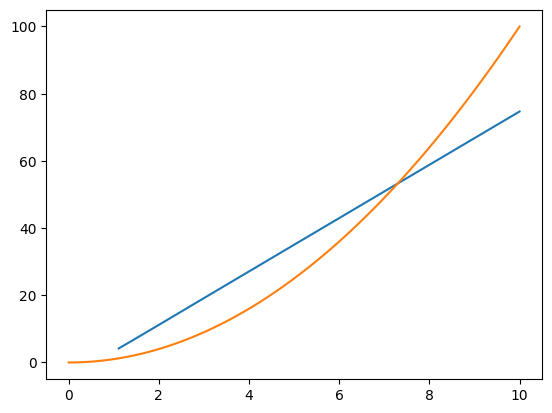

In [9]:
predicted = model.predict(xt)
plt.plot(x[11:], predicted)
plt.plot(x,y)